In [1]:
import pandas as pd
import sys
import importlib
sys.path.append("../scripts/")
import regex_gradle
import rq_aux
import re
import matplotlib.pyplot as plt 
import seaborn as sns

importlib.reload(regex_gradle)
importlib.reload(rq_aux)
 #"small", "medium", "large"
sizes1 = rq_aux.sizes1

#"all", "small", "medium", "large"
sizes2 = rq_aux.sizes2 

In [2]:
regex = regex_gradle
plugins = regex.plugins
categories = regex.categories
prefix = "gradle_"
build_tool = "gradle"
is_build_tool = "is_gradle"
noerror = False
output_path = "../data/output_data/"
overview_dataset = f"{output_path}overview_daylight_witherror.csv"
alltasks_dataset = f"{output_path}all_tasks_witherror.csv"

In [3]:
rq_aux.check_categories(regex)

In [4]:
df = rq_aux.read_all_tasks(alltasks_dataset, build_tool, noerror)

Build tool gradle = 45259


In [5]:
tasks = {}
for x in sizes1:
  tasks[x] = rq_aux.get_tasks_by_kind(df[df["size"] == x], plugins)

tasks['all'] = rq_aux.get_tasks_by_kind(df, plugins)

In [6]:
sum_tasks = {}
for x in sizes2:
  sum_tasks[x] = rq_aux.calc_energy_by_task(tasks[x])


In [7]:
for x in sizes2:
  print(f"**** {x.title()} ****")
  rq_aux.print_all_tasks(rq_aux.filter_tasks_by(sum_tasks[x], '', 0.02))
  print("")

**** All ****
total: Energy: 6221774.754941069 (100.0%)
test: Energy: 1794550.8904868066 (28.8%)
jmh: Energy: 666912.250396649 (10.7%)
other: Energy: 622871.8667808997 (10.0%)
javadoc: Energy: 284742.5509916971 (4.6%)
publish: Energy: 261143.7622737582 (4.2%)
func_test: Energy: 243159.86741640556 (3.9%)
build: Energy: 225309.68129275588 (3.6%)
compile: Energy: 198044.85424105797 (3.2%)
jar: Energy: 197491.55279831475 (3.2%)
build_src: Energy: 177420.7789023028 (2.9%)
checkstyle: Energy: 167521.0895869761 (2.7%)
test_class: Energy: 147419.94039543663 (2.4%)

**** Small ****
total: Energy: 162448.83453355863 (100.0%)
plugin-verifier: Energy: 93421.4843739821 (57.5%)
other: Energy: 23877.95570034474 (14.7%)
test: Energy: 8279.375270276762 (5.1%)
jar: Energy: 5478.76339982698 (3.4%)
javadoc: Energy: 5100.688325883181 (3.1%)
spotless: Energy: 4819.1230120089485 (3.0%)
compile: Energy: 3370.117706301797 (2.1%)
resources: Energy: 3285.275331639101 (2.0%)

**** Medium ****
total: Energy: 20660

In [8]:
df = pd.read_csv(overview_dataset)

# Remove Maven Workflows Without Maven Subtasks
df = rq_aux.remove_workflows_no_subtask(df[df[is_build_tool]], prefix, plugins)

df_size = rq_aux.create_dfs_size(df, is_build_tool)

Workflows No Subtask: Removed 302 workflows: 719 -> 417


In [9]:
# Calculate build tool-related energy consumption for all build tool wookflows
tasks = {}

for x in sizes2:
  print(f"*** {x.title()} ***")
  tasks[x] = rq_aux.calc_sum(df_size[x], prefix, plugins)
  rq_aux.calc_workflow_energy_proportion (df_size[x], tasks[x])
  rq_aux.calc_ratio(tasks[x])
  print(f"{df_size[x]['energy'].sum():0.2f}")  
  

*** All ***
Energy:  6221775 (28.1%)
Seconds:  286877252134 (25.9%)
22112765.67
*** Small ***
Energy:  162449 (39.7%)
Seconds:  7902238194 (36.2%)
408948.65
*** Medium ***
Energy:  2066006 (36.0%)
Seconds:  93138667065 (33.3%)
5740522.07
*** Large ***
Energy:  3993320 (25.0%)
Seconds:  185836346875 (23.0%)
15963294.94


/home/rlefeuvr/Documents/Workspace/ICT4S_2025/energy-CI-CD/analysis/../scripts/rq_aux.py:46: RuntimeWarning: invalid value encountered in scalar divide
  return round(100 * x / y, n)


In [10]:
for x in sizes2:
  print(f"**** {x.title()} ****")
  rq_aux.print_tasks_summary(rq_aux.filter_tasks_by(tasks[x], 'energy', 0.02))
  print("")

**** All ****
*** Total ***
N:  100.0%;  Energy:  100.0%;  Seconds:  100.0%;  Rat_P:  nan%;  Rat_N:  100.0%;  
*** Gradle_Test ***
N:  4.7%;  Energy:  28.8%;  Seconds:  26.2%;  Rat_P:  nan%;  Rat_N:  612.3%;  
*** Gradle_Jmh ***
N:  0.9%;  Energy:  10.7%;  Seconds:  15.4%;  Rat_P:  nan%;  Rat_N:  1163.4%;  
*** Gradle_Other ***
N:  29.3%;  Energy:  10.0%;  Seconds:  9.8%;  Rat_P:  nan%;  Rat_N:  34.2%;  
*** Gradle_Javadoc ***
N:  3.9%;  Energy:  4.6%;  Seconds:  3.8%;  Rat_P:  nan%;  Rat_N:  116.8%;  
*** Gradle_Publish ***
N:  0.5%;  Energy:  4.2%;  Seconds:  3.4%;  Rat_P:  nan%;  Rat_N:  917.7%;  
*** Gradle_Func_Test ***
N:  0.1%;  Energy:  3.9%;  Seconds:  4.1%;  Rat_P:  nan%;  Rat_N:  4314.2%;  
*** Gradle_Build ***
N:  4.2%;  Energy:  3.6%;  Seconds:  3.9%;  Rat_P:  nan%;  Rat_N:  85.5%;  
*** Gradle_Compile ***
N:  5.5%;  Energy:  3.2%;  Seconds:  2.8%;  Rat_P:  nan%;  Rat_N:  58.4%;  
*** Gradle_Jar ***
N:  7.7%;  Energy:  3.2%;  Seconds:  3.0%;  Rat_P:  nan%;  Rat_N:  41.0%; 

In [11]:
energy_category = {}

for x in sizes2:
  energy_category[x] = rq_aux.calc_energy_category(categories, plugins, 'energy', tasks[x], prefix)

print(energy_category['all'])
print(sum(energy_category['all'].values()))
print(tasks['all']["total"]["energy"], tasks['all'][prefix + "other"]["energy"])

{'Integration Test': np.float64(354860.3960971458), 'Unit Test': np.float64(1852762.1644105918), 'Compile': np.float64(1464325.0512518506), 'Documentation': np.float64(313735.7402988593), 'Install': np.float64(16951.2923445133), 'Linter': np.float64(446080.48965294583), 'Packaging': np.float64(570833.9545845664), 'Others': np.float64(579353.799519699), 'Unclassified': np.float64(622871.8667809005)}
6221774.754941073
6221774.754941071 622871.8667809005


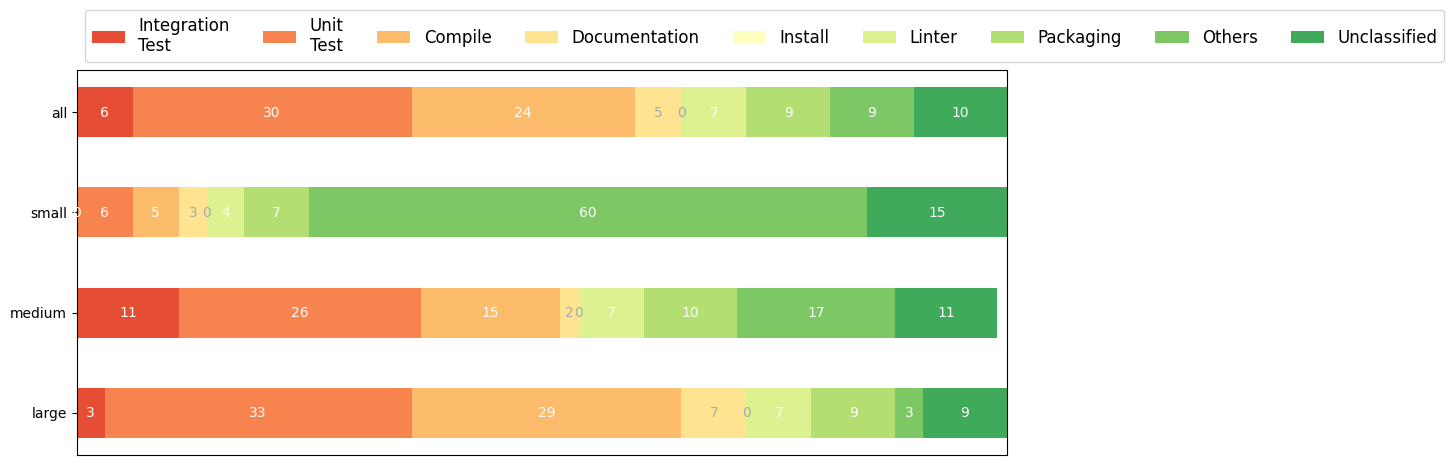

In [12]:
cat_ratios = {}
for key, value in energy_category.items():
    cat_ratios[key] = rq_aux.get_ratio_categories(value)
    
    
results = { }
for x in sizes2:
    results[x] = cat_ratios[x]
    

category_names = []
for key, value in energy_category['all'].items():
    category_names.append(key) 

labels = [re.sub(' ', '\n', x) for x in category_names]
rq_aux.survey(results, labels)
plt.show()


In [13]:
n_category = {}

for x in sizes2:
  n_category[x] = rq_aux.calc_energy_category(categories, plugins, 'n', tasks[x], prefix)

print(n_category['all'])
print(sum(n_category['all'].values()))
print(tasks['all']["total"]["n"], tasks['all'][prefix + "other"]["n"])

{'Integration Test': np.int64(256), 'Unit Test': np.int64(2542), 'Compile': np.int64(8466), 'Documentation': np.int64(1888), 'Install': np.int64(114), 'Linter': np.int64(4035), 'Packaging': np.int64(11374), 'Others': np.int64(3319), 'Unclassified': np.int64(13265)}
45259
45259 13265


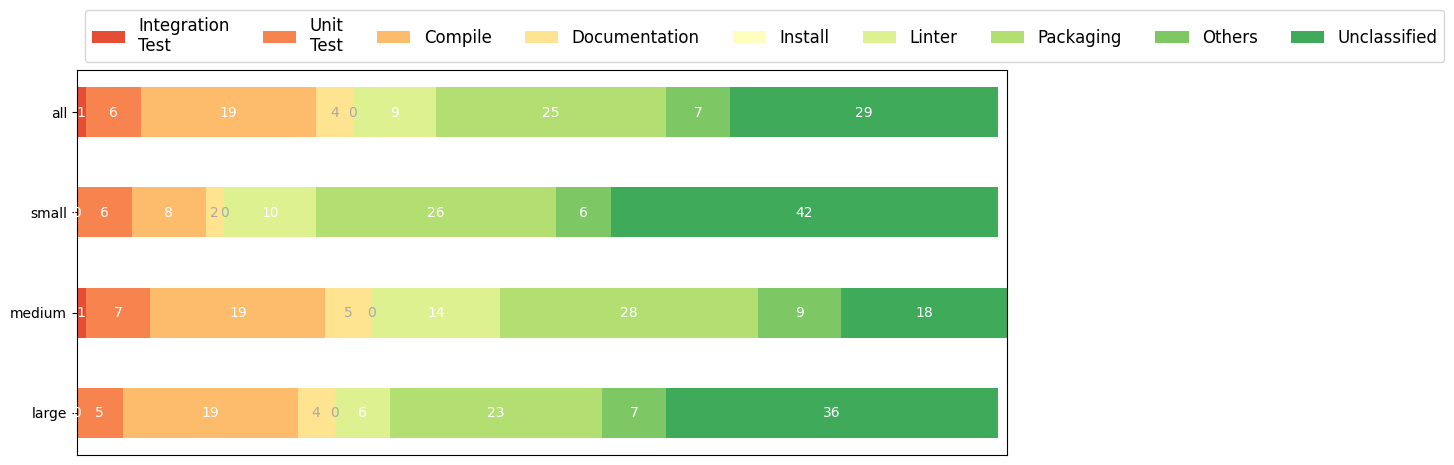

In [14]:
cat_ratios = {}
for key, value in n_category.items():
    cat_ratios[key] = rq_aux.get_ratio_categories(value)
    
    
results = { }
for x in sizes2:
    results[x] = cat_ratios[x]
    

category_names = []
for key, value in n_category['all'].items():
    category_names.append(key) 

labels = [re.sub(' ', '\n', x) for x in category_names]
rq_aux.survey(results, labels)
plt.show()

In [15]:
time_category = {}

for x in sizes2:
  time_category[x] = rq_aux.calc_energy_category(categories, plugins, 'seconds', tasks[x], prefix)

print(time_category['all'])
print(sum(time_category['all'].values()))
print(tasks['all']["total"]["seconds"], tasks['all'][prefix + "other"]["seconds"])

{'Integration Test': np.int64(17953594989), 'Unit Test': np.int64(78211393555), 'Compile': np.int64(78537017477), 'Documentation': np.int64(11751182850), 'Install': np.int64(1039070294), 'Linter': np.int64(18686002630), 'Packaging': np.int64(24107384739), 'Others': np.int64(28529614266), 'Unclassified': np.int64(28061991334)}
286877252134
286877252134 28061991334


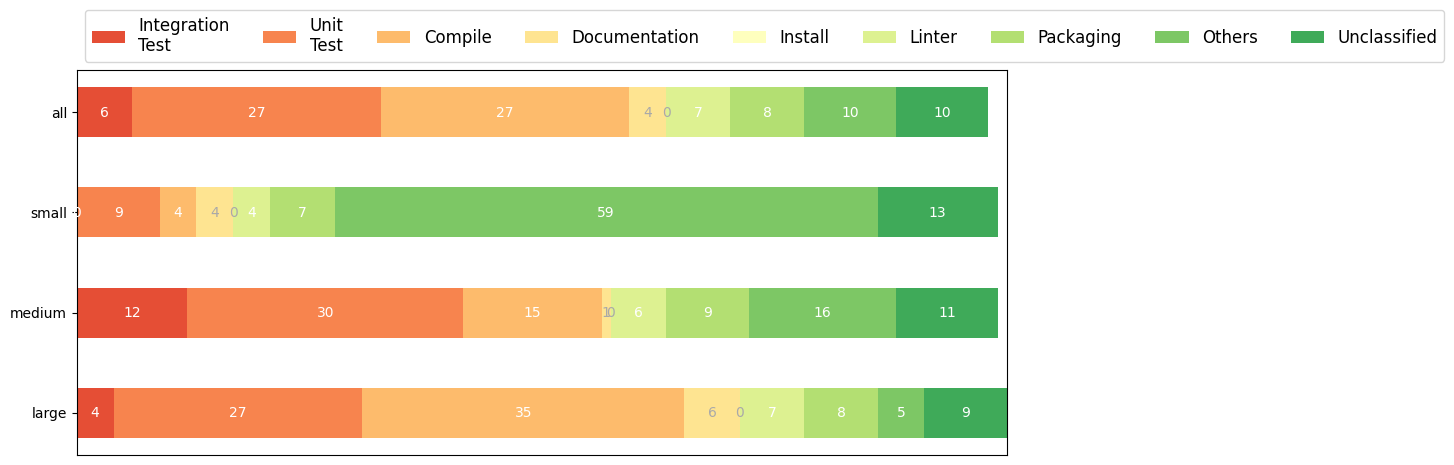

In [16]:
cat_ratios = {}
for key, value in time_category.items():
    cat_ratios[key] = rq_aux.get_ratio_categories(value)
    
    
results = { }
for x in sizes2:
    results[x] = cat_ratios[x]
    

category_names = []
for key, value in time_category['all'].items():
    category_names.append(key) 

labels = [re.sub(' ', '\n', x) for x in category_names]
rq_aux.survey(results, labels)
plt.show()